In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

Análise Exploratória dos Dados

In [2]:
data_location = "../Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Verificando se há dados nulos

In [4]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
data.fraud.unique()

array([0., 1.])

In [6]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [7]:
#sns.pairplot(data, 
#             hue = 'fraud'
#            );

# Balanceamento da variável target

In [8]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Verificamos que nesse conjunto apenas 8% dos dados são de cartões fraudados

Para resolver o problema do balanceamento vamos primeiramente criar dois datasets, um para os dados com frades e outro com dados sem fraude

In [9]:
no_fraud=data[data.fraud == 0]
fraud=data[data.fraud == 1]

Pegando uma amostra de 5000 para cada cada dataset, com fraude e sem fraude

In [10]:
dt_no_fraude_sample=no_fraud.sample(n=5000)
dt_fraude_sample=fraud.sample(n=5000)

Criação de um novo dataset com as amostras criadas anteriormente

In [11]:
data_fraud=pd.concat([dt_no_fraude_sample,dt_fraude_sample],axis=0)

In [12]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: fraud, dtype: float64

In [13]:
data_fraud


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
393757,2.363302,0.652428,0.274961,1.0,0.0,1.0,0.0,0.0
63747,14.393029,6.070235,0.979234,1.0,0.0,0.0,1.0,0.0
908301,4.027056,0.097768,6.764345,1.0,1.0,0.0,0.0,0.0
739446,37.902857,0.576742,1.001281,1.0,0.0,0.0,1.0,0.0
472741,68.623664,2.077589,0.631197,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
365976,122.125583,0.086889,4.467300,1.0,1.0,0.0,1.0,1.0
988356,3.387592,0.190730,6.265464,1.0,1.0,0.0,1.0,1.0
884667,16.987558,1.770590,5.054872,1.0,1.0,0.0,1.0,1.0
114515,1.365553,0.086358,4.698229,0.0,0.0,0.0,0.0,1.0


In [14]:
data_fraud.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.000706,-0.092733,0.171881,-0.113258,-0.042032,0.069239,0.226330
distance_from_last_transaction,-0.000706,1.000000,-0.042981,-0.000221,-0.036357,-0.018500,0.037113,0.118365
ratio_to_median_purchase_price,-0.092733,-0.042981,1.000000,-0.036966,0.034351,-0.088406,0.144616,0.480660
repeat_retailer,0.171881,-0.000221,-0.036966,1.000000,-0.012492,-0.003764,0.064188,0.002207
used_chip,-0.113258,-0.036357,0.034351,-0.012492,1.000000,0.019362,-0.017095,-0.112511
used_pin_number,-0.042032,-0.018500,-0.088406,-0.003764,0.019362,1.000000,-0.090156,-0.231092
online_order,0.069239,0.037113,0.144616,0.064188,-0.017095,-0.090156,1.000000,0.395480
fraud,0.226330,0.118365,0.480660,0.002207,-0.112511,-0.231092,0.395480,1.000000


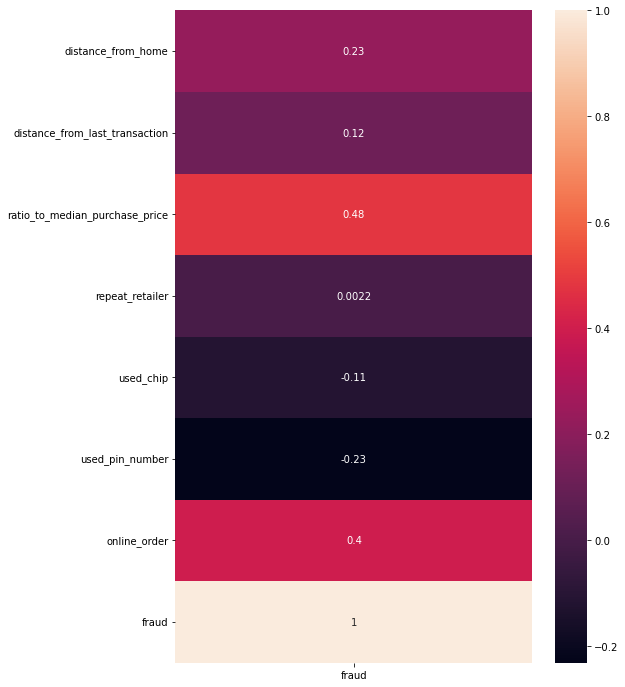

In [15]:
plt.figure(figsize = (8,12))
sns.heatmap(data_fraud.corr()[['fraud']], 
            annot = True
           );

# Criação de uma lista vazia para armazenar as métricas dos modelos

In [16]:
data_all=[]

# Definição das matriz features, variável varget - Sepração modelo treino e teste

Definindo a matriz de features e a variável target

In [17]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

Split do dataset de treino e de teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Verificando se as proporções da variável target no treino e teste são correspondentes

In [19]:
y_train.mean(), y_test.mean()

(0.5, 0.5)

Check dos dataset de treino e teste

In [20]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (7500, 7)
y_train: (7500,)
X_test: (2500, 7)
y_test: (2500,)


# Padronização das features do modelos de treino e de teste

In [21]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo 1: Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [22]:
lr = LogisticRegression()

Ajuste do modelo

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression()

Visualização dos coeficientes

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[ 2.33039644  1.66555901  5.94776225 -0.36896445 -0.57133664 -2.56292046
   2.01199491]]
[0.22986078]


Previsão da acurácia com o modelo treinado

In [25]:
score_train = accuracy_score(y_train, lr.predict(X_train_std))
print('Score train: ', score_train)

Score train:  0.9344


Matriz de confusão do modelo de treino

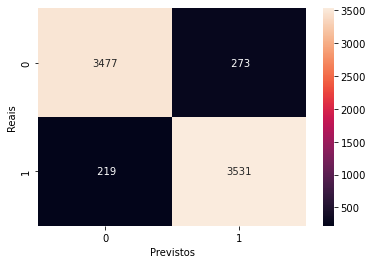

In [26]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 3750 casos positivos de fraud 3588 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [27]:
y_test_pred = lr.predict(X_test_std)

Acurácia do modelo de teste

In [28]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.944


Matriz de confusão do modelo de teste

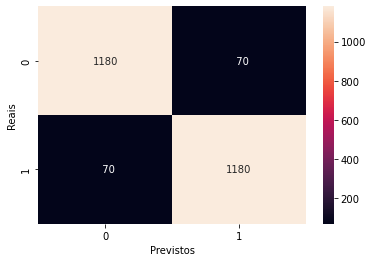

In [29]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 1250 casos positivos de fraud 1188 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Métricas do modelo de teste

In [30]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.94      0.94      0.94      1250
     Fraud 1       0.94      0.94      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



Inserindo as métricas na lista para armazenamento

In [31]:
m='Logistic Regression'
test_recall_lr = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc_lr = auc(fpr,tpr)
f1_score_lr = f1_score(y_test, y_test_pred)

In [32]:
data_all.append([m,score_train,score_test,test_recall_lr,test_auc_lr,f1_score_lr])

# Modelo 2: Random Forest

In [33]:
rf=RandomForestClassifier()

Treino do modelo usando os conjuntos de treinamento y_pred=clf.predict(X_test)

In [34]:
rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [35]:
score_train = accuracy_score(y_train, rf.predict(X_train_std))
print('Score train: ', score_train)

Score train:  1.0


In [36]:
y_test_pred = rf.predict(X_test_std)

In [37]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.9984


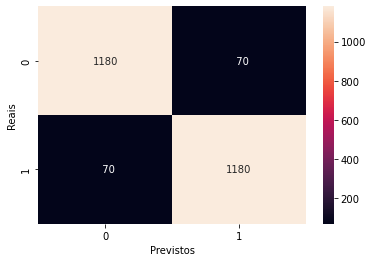

In [38]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

In [39]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00      1250
     Fraud 1       1.00      1.00      1.00      1250

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [40]:
m='Randon Forest'
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc = auc(fpr,tpr)
f1_score = f1_score(y_test, y_test_pred)

In [41]:
data_all.append([m,score_train,score_test,test_recall,test_auc,f1_score])

# Classificação KNN

# Primeiramente vamos escolher qual metrica vai me dar uma accuracy melhor (Euclidean,  Manhattan ou Chebyshev), também vamos escolher com quantos vizinhos a quantidade de vizinhos próximos pelo modelo de validação cruzada.

In [42]:
# Usamos cross validation co, 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)
scores_para_df = []
for i in range(1, 26):
# Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
    model_euclidean = KNeighborsClassifier(metric = 'euclidean', n_neighbors = i)
    model_manhattan = KNeighborsClassifier(metric = 'manhattan', n_neighbors = i)
    model_chebyshev = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = i)
# cross_val_scores retorna uma matriz de 5 resultados,
# um para cada partição que automaticamente criou CV
    cv_scores = cross_val_score(model_euclidean, X_train_std, y_train, cv = kf)
    cv_scores2 = cross_val_score(model_manhattan, X_train_std, y_train, cv = kf)
    cv_scores3 = cross_val_score(model_chebyshev, X_train_std, y_train, cv = kf)
# Para cada valor de n_neighbours, criamos um dicionário com o valor
# de n_neighbours e a média das pontuações
    dict_row_score = { 'n_neighbors': i, 'euclidean': np.mean(cv_scores),'manhattan': np.mean(cv_scores2),'chebyshev': np.mean(cv_scores3)}
# Salvamos cada um na lista definida fora do loop
    scores_para_df.append(dict_row_score)

# De acordo com os vizinhos próximos as 3 melhores accuracy das metricas estão grifadas em amarelo, a melhor metrica foi a manhattan

In [43]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.style.highlight_max(subset=['euclidean','manhattan','chebyshev'])

,n_neighbors,euclidean,manhattan,chebyshev
0,1,0.990800,0.991333,0.989467
1,2,0.987333,0.988800,0.986667
2,3,0.988667,0.989467,0.988000
3,4,0.987333,0.988400,0.987467
4,5,0.986133,0.987467,0.986000
5,6,0.986267,0.987867,0.985733
6,7,0.985333,0.986533,0.984933
7,8,0.985333,0.986933,0.984533
8,9,0.984667,0.986267,0.983333
9,10,0.983867,0.986000,0.983200


# Vamos utilizar a metrica distância de Euclidean com 3 vizinhos

In [44]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 4)

In [45]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [46]:
knn.fit(X_train_std, y_train);

In [47]:
y_pred = knn.predict(X_test_std)

In [48]:
accuracy_score(y_test, y_pred).round(4)

0.9435

In [49]:
confusion_matrix(y_test,y_pred)

array([[893,  86],
       [ 27, 994]], dtype=int64)

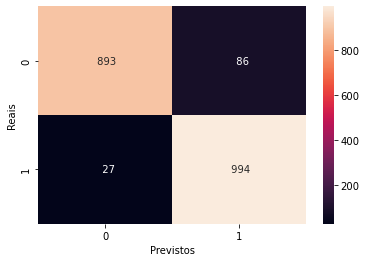

In [50]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

In [51]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.97      0.91      0.94       979
     Fraud 1       0.92      0.97      0.95      1021

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



# Decision Tree Classifier

### Dados para modelagem

In [52]:
data_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
393757,2.363302,0.652428,0.274961,1.0,0.0,1.0,0.0,0.0
63747,14.393029,6.070235,0.979234,1.0,0.0,0.0,1.0,0.0
908301,4.027056,0.097768,6.764345,1.0,1.0,0.0,0.0,0.0
739446,37.902857,0.576742,1.001281,1.0,0.0,0.0,1.0,0.0
472741,68.623664,2.077589,0.631197,1.0,0.0,0.0,1.0,0.0


### Selecionando o Prediction Target 

In [53]:
# Predction Target é a coluna que queremos prever e por covenção é chamada y
y = data_fraud.fraud

### Escolhendo as Features

In [54]:
cc_fraud_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
X = data_fraud[cc_fraud_features]
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.612224,8.130826,3.795664,0.886500,0.302900,0.056600,0.791000
std,86.412124,31.454831,4.925078,0.317219,0.459535,0.231088,0.406615
min,0.037825,0.001516,0.011373,0.000000,0.000000,0.000000,0.000000
25%,4.246830,0.328312,0.691439,1.000000,0.000000,0.000000,1.000000
50%,12.095500,1.105883,2.063543,1.000000,0.000000,0.000000,1.000000
75%,37.178575,4.098634,5.300597,1.000000,1.000000,0.000000,1.000000
max,1706.806743,1172.979839,124.417850,1.000000,1.000000,1.000000,1.000000


In [55]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
393757,2.363302,0.652428,0.274961,1.0,0.0,1.0,0.0
63747,14.393029,6.070235,0.979234,1.0,0.0,0.0,1.0
908301,4.027056,0.097768,6.764345,1.0,1.0,0.0,0.0
739446,37.902857,0.576742,1.001281,1.0,0.0,0.0,1.0
472741,68.623664,2.077589,0.631197,1.0,0.0,0.0,1.0


### Construindo o Modelo

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Definição do modelo. Especificar um número para random_state para garantir os mesmos resultados em cada execução.
dt = DecisionTreeClassifier(random_state=12)

#Normalizando os dados
escala = StandardScaler()
escala.fit(X)
Xnorm = escala.transform(X)

#Dividindo os dados em treino e teste
Xnorm_train,Xnorm_test, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.3, random_state=12)

# Treinar modelo 
dt.fit(Xnorm_train, ytrain)

DecisionTreeClassifier(random_state=12)

### Validação do Modelo - Decision Tree

In [57]:
from sklearn.metrics import mean_absolute_error
val_predictions = dt.predict(Xnorm_test)
print('Mean Absolute Error: ', mean_absolute_error(ytest, val_predictions))

Mean Absolute Error:  0.0016666666666666668


### Testando Random Forest Classifier

In [58]:
rf2 = RandomForestClassifier(random_state=12)
rf2.fit(Xnorm_train, ytrain)

RandomForestClassifier(random_state=12)

### Validação do Modelo - Random Forest

In [59]:
#Validando o modelo 
val_predictions_rf = rf2.predict(Xnorm_test)
print('Mean Absolute Error: ', mean_absolute_error(ytest, val_predictions_rf))

Mean Absolute Error:  0.001


### Prediction Probabilities

In [60]:
r_probs = [0 for _ in range (len(ytest))]
dt_probs = dt.predict_proba(Xnorm_test)
rf_probs = rf2.predict_proba(Xnorm_test)

In [61]:
dt_probs = dt_probs[:,1]
rf_probs = rf_probs[:,1]

### Obtendo os valores de AUROC e ROC 

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculando AUROC

AUROC é a área embaixo da curva de ROC

In [63]:
r_auc = roc_auc_score(ytest, r_probs)
dt_auc = roc_auc_score(ytest, dt_probs)
rf_auc = roc_auc_score(ytest, rf_probs)

### Printando AUROC scores

In [64]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.998
Random Forest: AUROC = 1.000


### Calculando a Curva ROC

In [65]:
r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

### Plotando a curva ROC

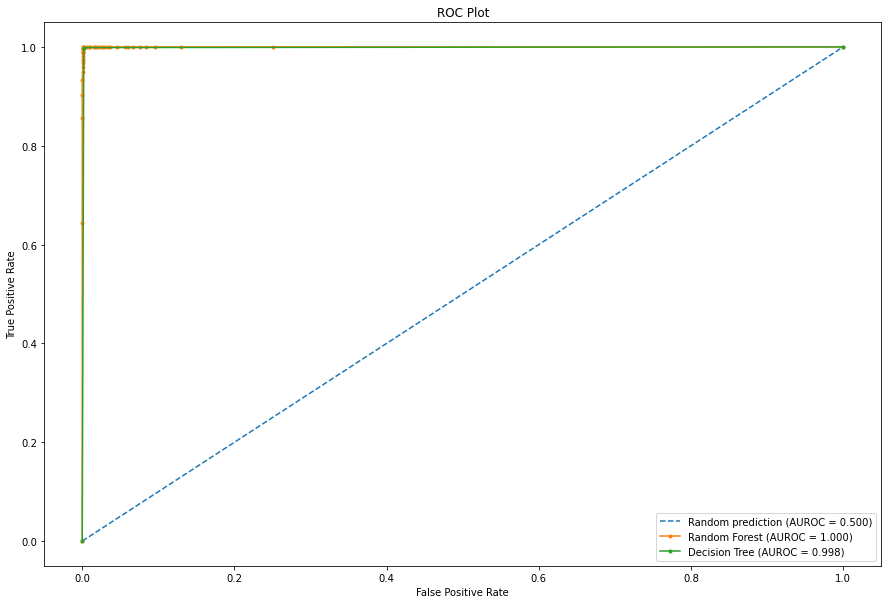

In [66]:
plt.figure(figsize = (15,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### Confusion Matrix - Decision Tree

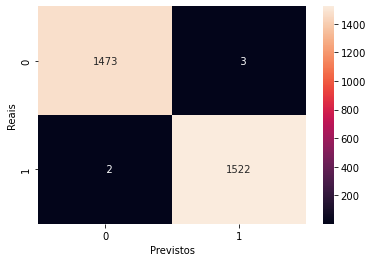

In [67]:
sns.heatmap(confusion_matrix(ytest, dt.predict(Xnorm_test)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

### Confusion Matrix - Random Forest

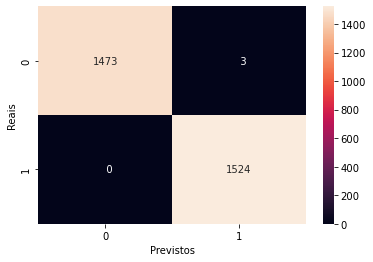

In [68]:
sns.heatmap(confusion_matrix(ytest, rf.predict(Xnorm_test)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

#  DEIXAR ESSE PARA FINAL, OS MODELOS DEVEM SER INSERIDOS ANTES DAQUI
Transformando a lista de métricas num dataframe e imprimindo as informações de todos modelos

In [69]:
models=['LogReg','RanFor']
pd_scores=pd.DataFrame(data_all,columns=['model','train score','test score','test recall','test_auc','F1 Score'])
print(pd_scores)

                 model  train score  test score  test recall  test_auc  \
0  Logistic Regression       0.9344      0.9440       0.9440    0.9440   
1        Randon Forest       1.0000      0.9984       0.9984    0.9984   

   F1 Score  
0    0.9440  
1    0.9984  


Modelo 3: MOdelo Gaussian Naive Bayes